In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from My_functions import reverse_colourmap 

In [2]:
prefix = "_nano_diatoms_zoo_meso_inputs"  # "_nano_diatom_zoo_meso"# "_no_physics"#
save_figs = 0

In [3]:
id_file = "_1ts"
sim_duration = 2

files_home = "/data/rd_exchange/mbelharet/nemo_4.2_fabm_pisces/ONLINE/"
filename_fabm = "C1D_PAPA_fabm" + prefix +  id_file + "_20100615_201" + str(sim_duration) + "0614_diad_T.nc"  
filename_oce_fabm = "C1D_PAPA_fabm" + prefix +  id_file + "_20100615_201" + str(sim_duration) + "0614_grid_T.nc"
filename_W_fabm = "C1D_PAPA_fabm" + prefix +  id_file + "_20100615_201" + str(sim_duration) + "0614_grid_W.nc"

filename = "C1D_PAPA" + prefix +  id_file +"_20100615_201" + str(sim_duration) + "0614_diad_T.nc"
filename_oce = "C1D_PAPA" + prefix +  id_file +"_20100615_201" + str(sim_duration) + "0614_grid_T.nc"
filename_W = "C1D_PAPA" + prefix +  id_file +"_20100615_201" + str(sim_duration) + "0614_grid_W.nc"

In [4]:
data_fabm = xr.open_dataset(files_home + "/" + filename_fabm).isel(x=0, y=0)  
data_oce_fabm = xr.open_dataset(files_home + "/" + filename_oce_fabm).isel(x=0, y=0)
data_W_fabm = xr.open_dataset(files_home + "/" + filename_W_fabm).isel(x=0, y=0)

data = xr.open_dataset(files_home + "/" + filename).isel(x=0, y=0)
data_oce = xr.open_dataset(files_home + "/" + filename_oce).isel(x=0, y=0)
data_W = xr.open_dataset(files_home + "/" + filename_W).isel(x=0, y=0)

In [5]:
flags = ["_fabm"] #, ""]

ndt_min = 100 * 24
ndt_max =  200*24 #365 * 24 * 2 


#print("nano" + flag + "= data" + flag +"[\"nano_phyto\"].to_numpy()")
ncVars_phy = ["xlimphy", "zlim1_phy", "zlim2_phy", "zlim4_phy", "zcompaph", "zlim1_bis_phy", "xdiss"]
ncVars_dia = ["ztortp", "zrespp"]#["zpr_dia", "zpronew_dia", "zprorca_dia", "zval_dia"]
ncVars_optic = ["PAR"] #["PAR", "etot_ndcy", "heup", "heup_01", "qsr", "pqsr100", "pe1", "pe2", "pe3", "enano", "enanom", "ediat", "ediatm", "Tchl"] 
ncVars_zoo = ["zgraztotf_zoo", "zgraztotc_zoo", "zgrasrat_zoo" ] #["zgrasrat_zoo", "zgrasratn_zoo", "zepshert_zoo", "zepsherv_zoo", "zgrazd", "zfood", "zfoodlim", "ztmp2", "zgraznc", "zgrazpoc", "zgraze" ] #"zgrazd", "zfood", "zfoodlim", "ztmp2", "zgraznc", "zgrazpoc", "zgraze"]
ncVars_meso = ["zepsherv", "zproport", "zgraztotc"] #["quotan", "ztmp3", "zcompapoc", "zgrazpoc", "zgrasratn" , "zepsherv","zepsherf", "zepshert", 
               #"zepsherq", "zbeta", "zgrazpof", "zproport", "zgraztotc" , "zgrasratf"]
ncVars_dust = [ "zdust"]
ncVars_iron = ["Fe3", "FeL1", "TL1", "FESCAV", "FECOLL", "zkeq", "zklight", "zconsfe", "za1", "ztfe", "plig"]
ncVars_nitrogen_fixation = ["nitrpot", "zmudia" ]
ncVars_sed = ["ironsed"]
ncVars_poc = ["zremi_poc", "ztremint_poc", "pom_prod", "pom_zpoc", "pom_expz"
              , "pom_alpha1", "pom_alpha2", "pom_alpha3", "pom_alpha4", "pom_alpha5", "pom_alpha6", "pom_alpha7"
             , "pom_alpha8", "pom_alpha9", "pom_alpha10", "pom_alpha11", "pom_alpha12", "pom_alpha13", "pom_alpha14", "pom_alpha15" ]
ncVars_goc = ["zremi_goc",  "ztremint_goc",  "gom_alpha1", "gom_alpha2", "gom_alpha3", "gom_alpha4", "gom_alpha5", "gom_alpha6", "gom_alpha7"
             , "gom_alpha8", "gom_alpha9", "gom_alpha10", "gom_alpha11", "gom_alpha12", "gom_alpha13", "gom_alpha14", "gom_alpha15"]
ncVars_si_rem = ["zfacsi", "zsiremin", "zfacsib", "zosil", "zdep","zdep_cond"]
ncVars_oxy = ["Oflx","zfld16","zflu16"]
ncVars_day_len = ["heup_01"]
ncvars_turbocline = ["hmld"]

ncVars = ncVars_iron +  ncVars_dust #+ 
ncVars_oce = ["votemper", "vosaline"] 
ncVars_W = ["avt"]

In [6]:
##### Pisces variables #############
id = -1
for flag in flags:
    id+=1
    for ncVar in ncVars:
        exec(ncVar + flag + "= data" + flag +"[\"" + ncVar + "\"].to_numpy()")

    for ncVar in ncVars_oce:
        exec(ncVar + flag + "= data_oce" + flag +"[\"" + ncVar + "\"].to_numpy()")

    for ncVar in ncVars_W:
        exec(ncVar + flag + "= data_W" + flag +"[\"" + ncVar + "\"].to_numpy()")



In [7]:
##### depth of vertical levels ######
depth = data['deptht'].to_numpy()
##### time counter ##################

In [8]:
depth_min = 0 #1000 #500
depth_max = 2 #1200 #600
dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

In [9]:
def plot_variables(variables, anomaly=0, legend = 1):
    fig = plt.figure(figsize=(10,6))
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    B = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        for flag in flags:
            
            ldict = {}
            exec("v =" +  var + flag , globals(),ldict)
            v = ldict['v']
            
            x_scale = np.arange(ndt_min-ndt_min+1,ndt_max-ndt_min+1) /24
            #print(v.shape)
            if(v.ndim == 1):
                v_mean = v
            elif(v.ndim == 2):
                v = v[:,dep_min_id:dep_max_id]
                v_mean = v[:,0]
            else:
                print("coucou")

            if anomaly:
                A = v_mean[ndt_min:ndt_max] - B
                B = v_mean[ndt_min:ndt_max]
            else:
                plt.plot(x_scale, v_mean[ndt_min:ndt_max])
                
        if anomaly:
            plt.plot(x_scale, A)
            legend = 0
               
            #plt.plot(v_mean[ndt_min:ndt_max])
            
            
        
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        #plt.ylim([-1 , 1])
        plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
        plt.xlabel("Time steps",fontsize=8)
        if(legend):
            plt.legend(["Fabmized", "Original"])

    # Space between subplots
    fig.tight_layout(pad=1.5)

In [10]:
def plot_vertical_profiles(variables):
    fig = plt.figure(figsize=(10,8))
  
    nb = int(np.ceil(len(variables)/3))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,3,cptr)
        
        for flag in flags:
            ldict = {}
            exec("v =" +  var + flag + "[ndt_min:ndt_max,dep_min_id:dep_max_id]", globals(),ldict)
            v = ldict['v']
            v_mean = np.mean(v,axis=0)
            
            plt.plot(v_mean,-dep)

        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        plt.xlabel("$µmol\ L^{-1}$",fontsize=8)
        plt.ylabel("Depth (m)",fontsize=8)
        plt.legend(["Fabmized", "Original"])

    # Space between subplots
    fig.tight_layout(pad=1.5)


In [11]:
def plot_hovmoller_anomaly(variables, depth_limits=[0,1000], time_limits=[0,2], c_limits=[0,0], percentage=0):
    depth_min = depth_limits[0]
    depth_max = depth_limits[1]
    dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
    dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

    ndt_min = time_limits[0]
    ndt_max = time_limits[1]
    

    fig = plt.figure(figsize=(10,8))
    my_cmap = reverse_colourmap(plt.cm.Spectral)
    
    nb = 2 #int(np.ceil(len(variables)/2))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        ldict = {}
        exec("v_fabm =" +  var + "_fabm[" + str(ndt_min) + ":" + str(ndt_max) + "," + str(dep_min_id) + ":" + str(dep_max_id) + "]", globals(),ldict)
        v_fabm = ldict['v_fabm']
        exec("v =" +  var + "[" + str(ndt_min) + ":" + str(ndt_max) + "," + str(dep_min_id) + ":" + str(dep_max_id) + "]", globals(),ldict)
        v = ldict['v']
        if(percentage):
            v_anomaly_ = 100*(v_fabm - v) / v
        else:
            v_anomaly_= v_fabm - v
        v_anomaly = np.transpose(v_anomaly_)

        x = np.arange(0,v_anomaly.shape[1])*t_step /24
        [X,dep] = np.meshgrid(x,depth[dep_min_id:dep_max_id])
        
        pc = ax.pcolormesh(X,-dep,v_anomaly,cmap='bwr',shading="gouraud")
        clb=fig.colorbar(pc)
        if(c_limits[0]<c_limits[1]):
            pc.set_clim(c_limits[0],c_limits[1])
        plt.title(var , fontsize=12)
        plt.xlabel("Time steps")
        plt.ylabel("Depth (m)")

    # Space between subplots
    fig.tight_layout(pad=1.5)

In [12]:
#zgraztotf_fabm = zgraztotf_fabm / (3600 * 24)
rtrn_fabm = 1.1102230246251565e-16
rtrn      = 1.1102230246251565e-16
xstep_fabm = 1/(3600 * 24)
xstep = 0.5/24 
#ratio = (zgraztotf_zoo * xstep + rtrn) / (zgraztotc_zoo * xstep + rtrn)
#ratio_fabm = (zgraztotf_zoo_fabm * xstep_fabm + rtrn_fabm/1800)/ (zgraztotc_zoo_fabm * xstep_fabm  + rtrn_fabm/1800)
#diff = zfld16 - zflu16
#diff_fabm = zfld16_fabm - zflu16_fabm


['Fe3', 'FeL1', 'TL1', 'FESCAV']


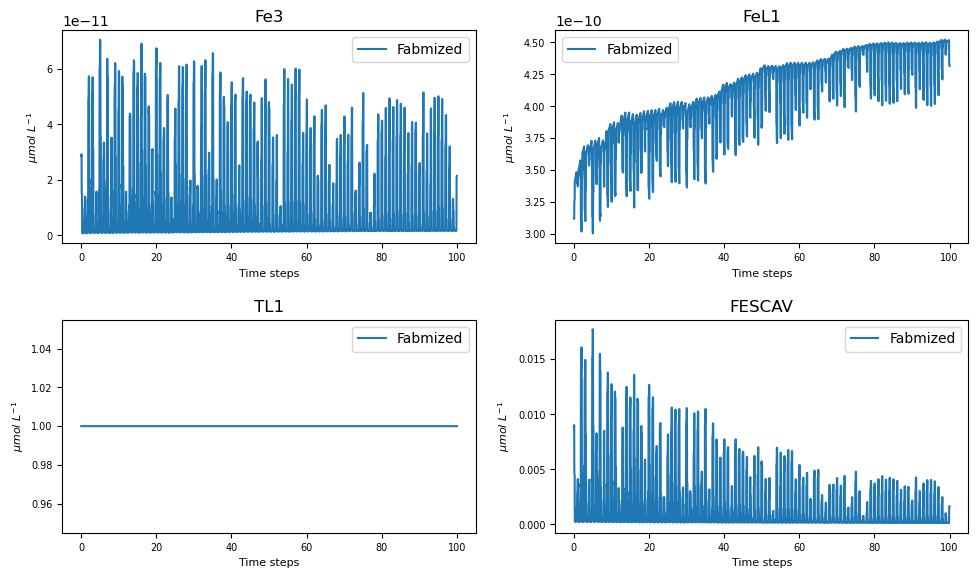

In [13]:
variables1 = ncVars[0:4] 
#variables1.append("diff")
print(variables1)
plot_variables(variables1, anomaly=0 )

if(save_figs):
    plt.savefig("comparison_BGC_variables_1" + prefix + ".png")

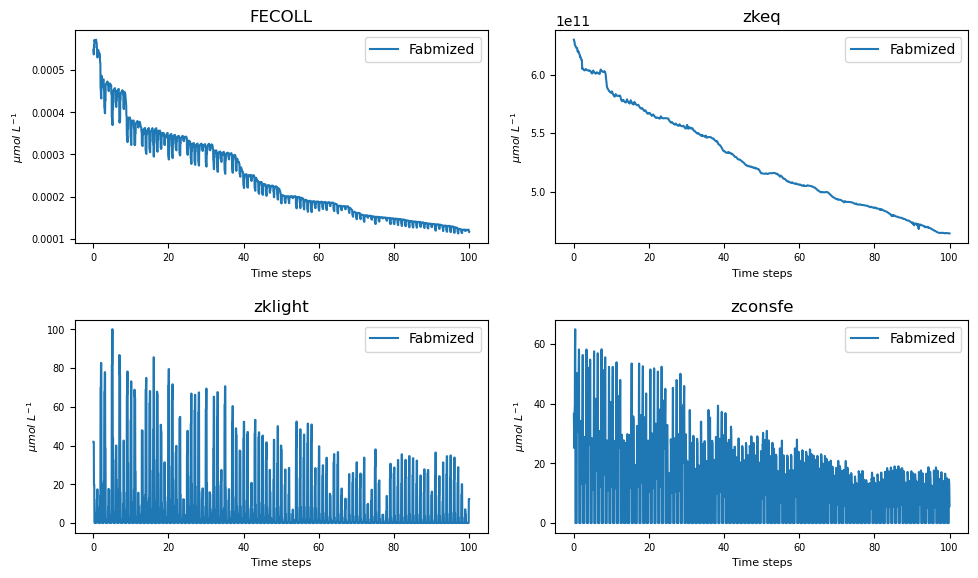

In [14]:
variables2 = ncVars[4:8]
plot_variables(variables2)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

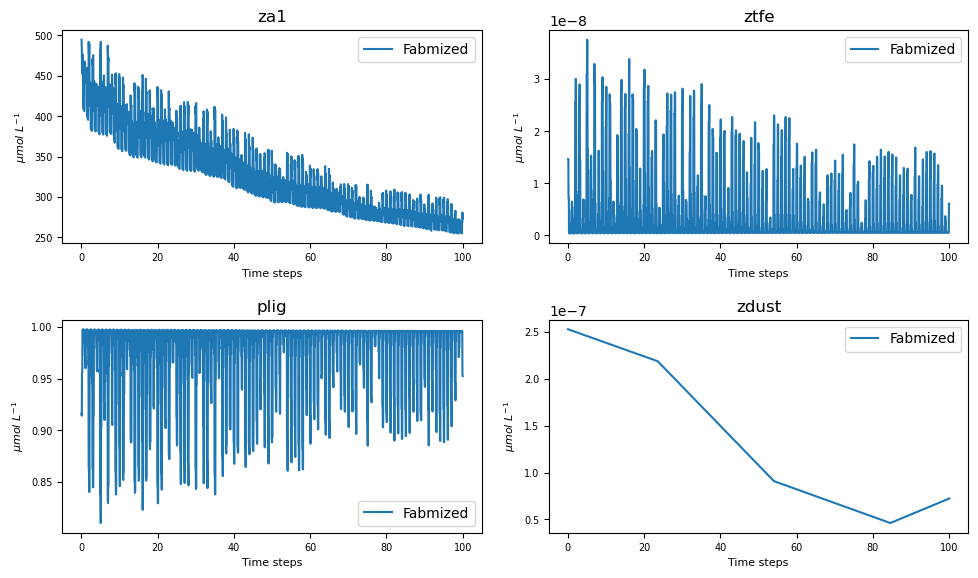

In [15]:
variables3 = ncVars[8:12]
plot_variables(variables3)

if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

In [16]:
variables4 = ncVars[12:18]
plot_variables(variables4)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

<Figure size 1000x600 with 0 Axes>

In [17]:
variables5 = ncVars[18:24]
plot_variables(variables5)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

<Figure size 1000x600 with 0 Axes>

In [18]:
var_fabm = zgrazpof_fabm / (zgraztotc_fabm / 1.e3)
var = zgrazpof / (zgraztotc / 1.e3)

variables5 = ["var"] #ncVars[18:24]
plot_variables(variables5)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

NameError: name 'zgrazpof_fabm' is not defined

In [ ]:
variables6 = ncVars[24:28]
plot_variables(variables6)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

In [ ]:
variables7 = ncVars[28:32]
plot_variables(variables7)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

In [ ]:
tgfunc = np.exp( 0.063913 * votemper )
tgfunc_fabm = np.exp( 0.063913 * votemper_fabm )

variables = ncVars_oce[0:] + [ "tgfunc"] 
plot_variables(variables, anomaly=1)
if(save_figs):
    plt.savefig("comparison_BGC_variables" + prefix + ".png")

In [ ]:
t_step =1
ndt_min = 0
ndt_max = 365*24
plot_hovmoller_anomaly(["avt"], depth_limits=[0, 200], time_limits=[ndt_min, ndt_max],c_limits=[-200, 200], percentage = 1)
plot_hovmoller_anomaly(["votemper"], depth_limits=[0, 300], time_limits=[ndt_min, ndt_max],c_limits=[-0.1, 0.1])
plot_hovmoller_anomaly(["vosaline"], depth_limits=[0, 300], time_limits=[ndt_min, ndt_max],c_limits=[-0.015, 0.015])

In [ ]:
variables_W = ncVars_W[0:]
depth_min = 0
depth_max = 200

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

dep = depth[dep_min_id:dep_max_id]

ndt_min = 7546
ndt_max =  7548

plot_vertical_profiles(variables_W)
plt.plot([5.e-4, 5.e-4], [-depth_max, -depth_min])
#plot_variables(variables_W)
if(save_figs):
    plt.savefig("comparison_BGC_variables_W" + prefix + ".png")

In [ ]:
# Negative values of PAR

id1 = np.argwhere(PAR_fabm<0)
id2 = np.argwhere(PAR<0)
#print(id1[0])

par_fabm_negativ = np.empty(id1.shape[0])
for i in range(0,id1.shape[0]):
    tt = id1[i]
    par_fabm_negativ[i] = PAR_fabm[tt[0],tt[1]]

id_min = np.argwhere(par_fabm_negativ == min(par_fabm_negativ))
print(id1[id_min])
print(min(par_fabm_negativ))

print(max(par_fabm_negativ)) 

#print(id2)
#print(id1.shape)
#print(id2.shape)


In [ ]:
variables3 = ncVars[7:10]
toto_fabm = local_random_fabm[:,0] / integral_random_weights_fabm 
variables3.append('toto')
plot_variables(variables3)

if(save_figs):
    plt.savefig("comparison_BGC_variables_3" + prefix + ".png")

In [ ]:
variables4 = ncVars[10:15]
plot_variables(variables4)
if(save_figs):
    plt.savefig("comparison_BGC_variables_4" + prefix + ".png")

In [ ]:

variables5 = ncVars[15:19]
goc_from_nano = 0.5 * xfracal * (ztortp + zresp);
goc_from_nano_fabm = 0.5 * xfracal_fabm * (ztortp_fabm + zresp_fabm);
variables5.append("goc_from_nano")
plot_variables(variables5)
if(save_figs):
    plt.savefig("comparison_BGC_variables_5" + prefix + ".png")

In [ ]:
variables6 = ncVars[19:21]
for flag in flags:
    exec("produit" + flag + " = " +  variables6[0] + flag + " * " + variables6[1] + flag)

variables6.append("produit")

plot_variables(variables6)
if(save_figs):
    plt.savefig("comparison_BGC_variables_6" + prefix + ".png")

In [ ]:
variables7 = ncVars[21:26]
plot_variables(variables7)
if(save_figs):
    plt.savefig("comparison_BGC_variables_7" + prefix + ".png")

In [ ]:
variables8 = ncVars[26:28]
plot_variables(variables8)
if(save_figs):
    plt.savefig("comparison_BGC_variables_8" + prefix + ".png")

In [ ]:

variables9 = ncVars[28:30]
plot_variables(variables9)
if(save_figs):
    plt.savefig("comparison_BGC_variables_9" + prefix + ".png")

In [ ]:
################### wsbio4 ################################
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)
wsbio = data["wsbio4"].to_numpy()

depth = data['deptht'].to_numpy()


In [ ]:
depth_min = 0
depth_max = 1000
ndt_min = 0
ndt_max = 1000 #24 * 365

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

In [ ]:
v = wsbio[10,dep_min_id:dep_max_id]
dep = depth[dep_min_id:dep_max_id]

fig = plt.figure(figsize=(10,6))
plt.plot(v,-dep)        
    
    

In [ ]:
################### Turbocline depth ################################
filename = "C1D_PAPA_1ts_20100615_20110614_grid_T.nc"

In [ ]:
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)

In [ ]:
hmld = data["hmld"].to_numpy()
hmld_fabm = data_fabm["hmld"].to_numpy()

In [ ]:
variables = ["hmld"]

In [ ]:
fig = plt.figure(figsize=(10,6))

nb = int(np.ceil(len(variables)/2))
cptr = 0
for var in variables:
    cptr+=1
    ax = fig.add_subplot(nb,2,cptr)zfactsi
    for flag in flags:
        exec("v =" +  var + flag ) 
        v_mean = v  #np.mean(v,axis=1)
             
        plt.plot(v_mean[0:ndt_max])
        
    
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.title(var , fontsize=12) 
    plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
    plt.xlabel("Time steps (h)",fontsize=8)
    plt.legend(["with FABM", "standard"])

# Space between subplots
fig.tight_layout(pad=1.5)

if(save_figs):
    plt.savefig("comparison_BGC_variables_3" + prefix + ".png")

In [ ]:
-0.001096*15**2 + 0.057*15 -0.637